**질문 1.** sklearn의 datasets에서 load_sample_images() 함수의 리턴값을 받아 길이와 타입을 확인하고 이미지를 출력해보세요.

{'images': [array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15

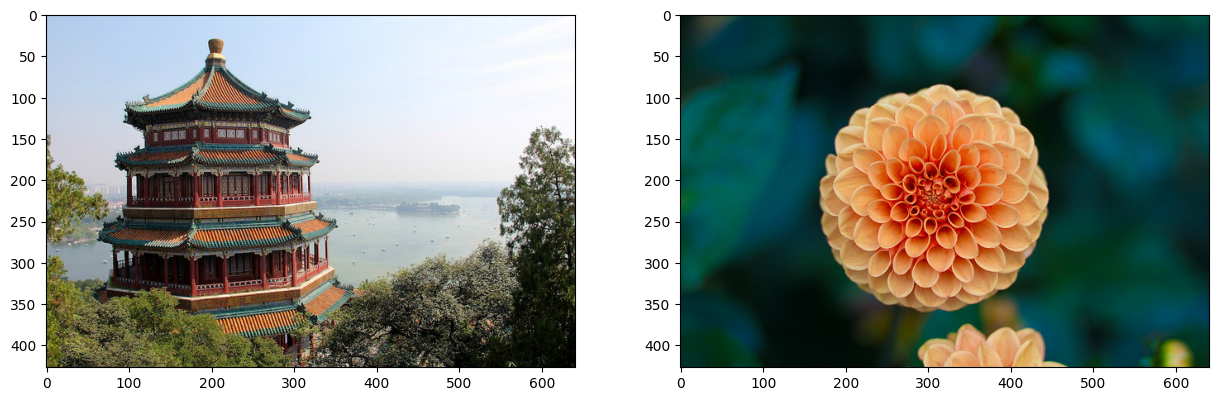

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

dataset = datasets.load_sample_images()
#데이터 셋 확인
print(dataset)

#길이와 타입 확인
print(f"length : {len(dataset.images)}, type : {type(dataset.images)}")

#이미지 출력
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
for ax, image in zip(axes, dataset['images']):
    ax.imshow(image)

**질문 2.** 위 이미지 데이터에서 x,y축의 표시를 제거하고 'flower' 이미지만 출력해보세요

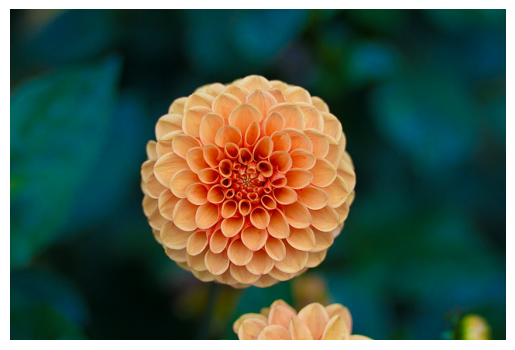

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

dataset = datasets.load_sample_images()

flower_image = dataset.images[1]

# Plot the image using matplotlib
plt.imshow(flower_image)
plt.axis('off')
plt.show()

**질문 3.**	스크래핑을 활용해서 '한식' 이미지를 10개 출력해보세요.

In [3]:
import sys

!sudo add-apt-repository ppa:saiarcot895/chromium-beta -y
!sudo apt remove chromium-browser
!sudo snap remove chromium
!sudo apt install chromium-browser

!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver/usr/bin

sys.path.insert(0, '/usr/lib/chromium-brower/chromdriver')

import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import numpy as np
import numpy as pd
import os
from IPython.display import Image, display
from urllib.parse import urlencode

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

webdriver_service = Service('/usr/bin/chromedriver')
driver = webdriver.Chrome(options=options)


#원하는 이미지 키워드
text = "한식"

#기본이 되는 주소
base = "https://www.google.com/search"

params = {
    "q": text,   # 원문을 넣으면 urlencode가 알아서 인코딩
    "udm": "2",
    "hl": "ko",
}
url = f"{base}?{urlencode(params)}"
driver.get(url)

time.sleep(3)

# 문서의 가장 아래까지 스크롤
for _ in range(5):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(0.8)

# 이미지 src 수집
imgs = driver.find_elements(By.CSS_SELECTOR, "img")
urls = []
for img in imgs:
    src = img.get_attribute("src") or img.get_attribute("data-src")
    if src and src.startswith("http"):
        urls.append(src)

# 앞 10개만 콜랩에 표시 (다운로드 없이 URL로 바로)
for u in urls[:10]:
    display(Image(url=u))

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu/ jammy main'
Description:
This PPA contains the latest Chromium Beta builds, with hardware video decoding enabled (hidden behind a flag), and support for Widevine (needed for viewing many DRM-protected videos) enabled.

== Hardware Video Decoding ==

To enable hardware video decoding, start Chromium with the --enable-features=VaapiVideoDecoder argument. To make this persistent, create a file at /etc/chromium-browser/customizations/92-vaapi-hardware-decoding with the following contents:

CHROMIUM_FLAGS="${CHROMIUM_FLAGS} --enable-features=VaapiVideoDecoder"

See also https://wiki.archlinux.org/title/Chromium#Hardware_video_acceleration for more information on VAAPI video decoding support.

=== Widevine Support ===

The packages in this PPA have support for Widevine inside Chromium enabled. However, you still need to copy some files from 

**질문 4.**	이미지 개수를 인자로 받아서 해당하는 개수만큼 이미지가 출력되도록 모듈을 작성해 보세요.

In [4]:
def showImg(count):
    #원하는 이미지 키워드
    text = "한식"

    #기본이 되는 주소
    base = "https://www.google.com/search"

    params = {
        "q": text,   # 원문을 넣으면 urlencode가 알아서 인코딩
        "udm": "2",
        "hl": "ko",
    }
    url = f"{base}?{urlencode(params)}"
    driver.get(url)

    time.sleep(3)

    # 문서의 가장 아래까지 스크롤
    for _ in range(5):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(0.8)

    # 이미지 src 수집
    imgs = driver.find_elements(By.CSS_SELECTOR, "img")
    urls = []
    for img in imgs:
        src = img.get_attribute("src") or img.get_attribute("data-src")
        if src and src.startswith("http"):
            urls.append(src)

    # 앞 10개만 콜랩에 표시 (다운로드 없이 URL로 바로)
    for u in urls[:count]:
        display(Image(url=u))

showImg(3)

**질문 5.**	4번 문제에 이어서, 특정 키워드를 인자로 받으면 해당하는 이미지를 출력하게 작성해보세요.

In [5]:
def showImg(count, keyword):

    #기본이 되는 주소
    base = "https://www.google.com/search"

    params = {
        "q": keyword,   # 원문을 넣으면 urlencode가 알아서 인코딩
        "udm": "2",
        "hl": "ko",
    }
    url = f"{base}?{urlencode(params)}"
    driver.get(url)

    time.sleep(3)

    # 문서의 가장 아래까지 스크롤
    for _ in range(5):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(0.8)

    # 이미지 src 수집
    imgs = driver.find_elements(By.CSS_SELECTOR, "img")
    urls = []
    for img in imgs:
        src = img.get_attribute("src") or img.get_attribute("data-src")
        if src and src.startswith("http"):
            urls.append(src)

    # 앞 10개만 콜랩에 표시 (다운로드 없이 URL로 바로)
    for u in urls[:count]:
        display(Image(url=u))

    driver.quit()

print('원하는 이미지 이름을 입력해주세요.')
word = input()
showImg(3, word)

원하는 이미지 이름을 입력해주세요.
축구공
